In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
import re
import math
import random
import time
import datetime
import json
import pickle
import glob

### Taking the Input from CSV File

In [67]:
df = pd.read_csv(r'C:\Users\Reet\Downloads\data_science_problem\data_science_problem\data_problem_1.csv')

df.head(3)

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18


In [2]:
!pip install geopy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



### Adding a column which tells about the distance in kilometers with the package geodesic

In [5]:
import pandas as pd
from geopy.distance import geodesic


# Function to calculate distance between two points in kilometers
def calculate_distance(row):
    # Create tuples of latitude and longitude for two points
    point1 = (row['R_Lat'], row['R_Lon'])
    point2 = (row['C_Lat'], row['C_Lon'])
    
    # Calculate distance using geodesic function
    distance = geodesic(point1, point2).kilometers
    return distance

# Apply the function to each row to calculate distances
df['Distance_km'] = df.apply(calculate_distance, axis=1)




In [6]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,Distance_km
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,2.235873
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,1.627795
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,0.904444
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,1.557861
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,3.768132


### Adding Duration Column to find the time taken for delivery for each item in minutes

In [7]:
df['duration'] = (pd.to_datetime(df['order_delivered_time']) - pd.to_datetime(df['order_pickedup_time'])).dt.total_seconds()/60

In [8]:
df['Pickup_location'] = df['R_Lat'].astype(str) + ',' + df['R_Lon'].astype(str)

In [9]:
df['Drop_location'] = df['C_Lat'].astype(str) + ',' + df['C_Lon'].astype(str)

In [10]:
df

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,Distance_km,duration,Pickup_location,Drop_location
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,2.235873,26.733333,"28.468983,77.063728","28.449929,77.07123"
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,1.627795,21.633333,"28.468983,77.063728","28.454522,77.066637"
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,0.904444,18.183333,"28.468983,77.063728","28.46157,77.06759"
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,1.557861,32.966667,"28.468983,77.063728","28.455738,77.058401"
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,3.768132,22.250000,"28.468983,77.063728","28.440068,77.083967"
...,...,...,...,...,...,...,...,...,...,...,...
237368,PRD_ZMT_8457746,77.207941,28.532886,77.201892,28.503037,2016-09-25 16:49:02,2016-09-25 17:18:55,3.360675,29.883333,"28.532886,77.207941","28.503037,77.201892"
237369,PRD_ZMT_8458181,88.352148,22.544237,88.369037,22.560074,2016-09-25 17:07:48,2016-09-25 17:22:04,2.468479,14.266667,"22.544237,88.352148","22.560074,88.369037"
237370,PRD_ZMT_8458897,72.916411,19.122455,72.918557,19.104956,2016-09-25 17:22:39,2016-09-25 17:43:55,1.950141,21.266667,"19.122455,72.916411","19.104956,72.918557"
237371,PRD_ZMT_8458955,78.379158,17.450286,78.391155,17.444102,2016-09-25 17:07:15,2016-09-25 17:26:16,1.446588,19.016667,"17.450286,78.379158","17.444102,78.391155"


### Now we will do and EDA to find out which pick uplocation has the highest mean of time. That means which customer location has ot face the highest waiting time. I am choosing top 10 values here in  descending order.

In [17]:
## EDA 

## which pick up location has the highest meanof time

df_mean = df.groupby(['R_Lat','R_Lon'])['duration'].mean().reset_index().sort_values(by='duration',ascending=False) 

df_mean['Pickup_location'] = (df_mean['R_Lat'].astype(str) + ',' + df_mean['R_Lon'].astype(str))
data = df_mean['duration'].values


df_mean_new = df_mean.head(10)

df_mean_new

,R_Lat,R_Lon,duration,Pickup_location
23,12.933000,77.614500,265.378125,"12.933,77.6145"
62,12.951493,77.711427,260.820833,"12.951493,77.711427"
858,17.457745,78.365488,178.544444,"17.457745,78.365488"
1108,22.539380,88.347174,93.416393,"22.53938,88.347174"
1224,28.461108,77.079687,83.233333,"28.461108,77.079687"
1020,19.119290,72.911828,67.100000,"19.11929,72.911828"
988,19.084627,72.828558,63.289123,"19.084627,72.828558"
1026,19.120217,72.907121,61.100000,"19.120217,72.907121"
994,19.110654,72.869850,56.350000,"19.110654,72.86985"
147,12.975932,77.726768,56.016667,"12.975932,77.726768"


In [18]:
# Lets check the summary statistics of the duration column
summary = df_mean['duration'].describe()
summary

count    1418.000000
mean       18.866376
std        12.041534
min         0.000000
25%        15.489566
50%        17.896534
75%        20.834573
max       265.378125
Name: duration, dtype: float64

### Plotting the top 10 pick up locations with high duration

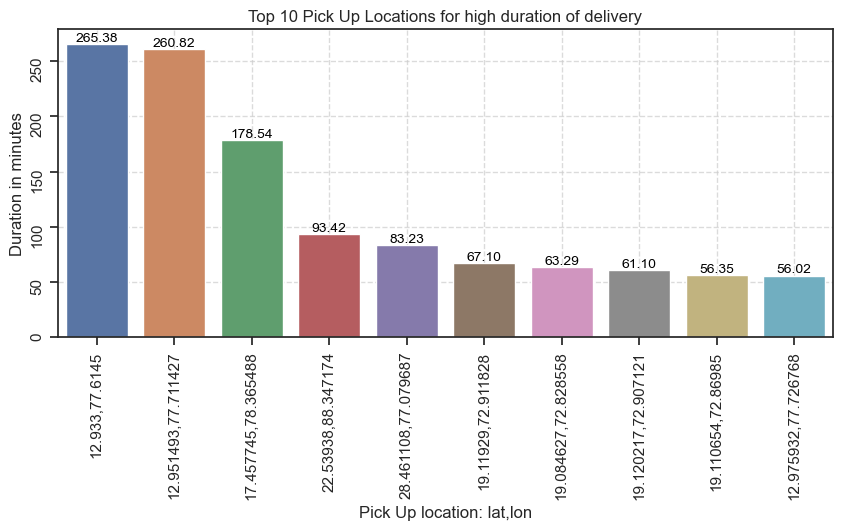

In [69]:
plt.figure(figsize=(10, 4))


x = list(df_mean_new['Pickup_location'])
values = list(df_mean_new['duration'])

#custom_palette = sns.color_palette("husl", len(x))

ax = sns.barplot(x=x, y=values)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color='black', fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Top 10 Pick Up Locations for high duration of delivery')
plt.xlabel('Pick Up location: lat,lon')
plt.ylabel('Duration in minutes')

# Rotate x ticks and set y ticks in rotation
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Show plot
plt.show()

### Plot the geographic heatmap based on the duration intesity of the delivery with package folium

In [20]:
import folium
from folium.plugins import HeatMap

# Sample data
data = [
    {'latitude': 12.933000, 'longitude': 77.614500, 'duration': 265.378125},
    {'latitude': 12.951493, 'longitude': 77.711427, 'duration': 260.820833},
    {'latitude': 17.457745, 'longitude': 78.365488, 'duration': 178.544444},
    {'latitude': 22.539380, 'longitude': 88.347174, 'duration': 93.416393},
    {'latitude': 28.461108, 'longitude': 77.079687, 'duration': 77.079687},
    {'latitude': 19.119290, 'longitude': 72.911828, 'duration': 67.100000},
    {'latitude': 19.084627, 'longitude': 72.828558, 'duration': 63.289123},
    {'latitude': 19.120217, 'longitude': 72.907121, 'duration': 61.100000},
    {'latitude': 19.110654, 'longitude': 72.869850, 'duration': 56.350000},
    {'latitude': 12.975932, 'longitude': 77.726768, 'duration': 56.016667}
    
    
    
    
    # Add more data points as needed
]

# # Load the data from a CSV file
# data = list(df_mean_new)

# Create a base map centered at a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=3)

# Add data points to the map
for point in data:
    folium.Marker(location=[point['latitude'], point['longitude']], popup=f"duration: {point['duration']}").add_to(m)

# Generate heatmap based on the 'value' column
heat_data = [[point['latitude'], point['longitude'], point['duration']] for point in data]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
#m.save('heatmap.html')

m

### We will try to see  which deliever location has the highest mean of distance of delievery. That means customer has to ship furthest. We will also choose here top 10 locations.

In [29]:
df_mean2 = df.groupby(['C_Lat','C_Lon'])['Distance_km'].mean().reset_index().sort_values(by='Distance_km',ascending=False)

df_mean2['Deliver_location'] = (df_mean2['C_Lat'].astype(str) + ',' + df_mean2['C_Lon'].astype(str))
data2 = df_mean2['Distance_km'].values


df_mean_new2 = df_mean2.head(10)

df_mean_new2

,C_Lat,C_Lon,Distance_km,Deliver_location
220609,45.824496,9.048856,7334.514772,"45.824496,9.048856"
220610,48.858871,2.295038,6593.128967,"48.858871,2.295038"
125650,22.280516,70.803416,1807.417025,"22.280516,70.803416"
1,10.157560,77.918005,1765.919272,"10.15756,77.918005"
6000,12.926895,77.677155,1730.979399,"12.926895,77.677155"
30151,12.991694,77.706126,1714.918469,"12.991694,77.706126"
33748,13.006264,77.506677,1708.593469,"13.006264,77.506677"
220608,31.644101,74.803395,1677.908822,"31.644101,74.803395"
120657,19.010970,72.864746,1659.529668,"19.01097,72.864746"
147757,26.909912,75.790637,1601.981912,"26.909912,75.790637"


In [30]:
### Summary statistics

summary2 = df_mean2['Distance_km'].describe()

summary2

count    220611.000000
mean          1.822901
std          26.145668
min           0.000000
25%           0.714321
50%           1.401326
75%           2.188046
max        7334.514772
Name: Distance_km, dtype: float64

### Plot of the top 10 highest distance customer location.

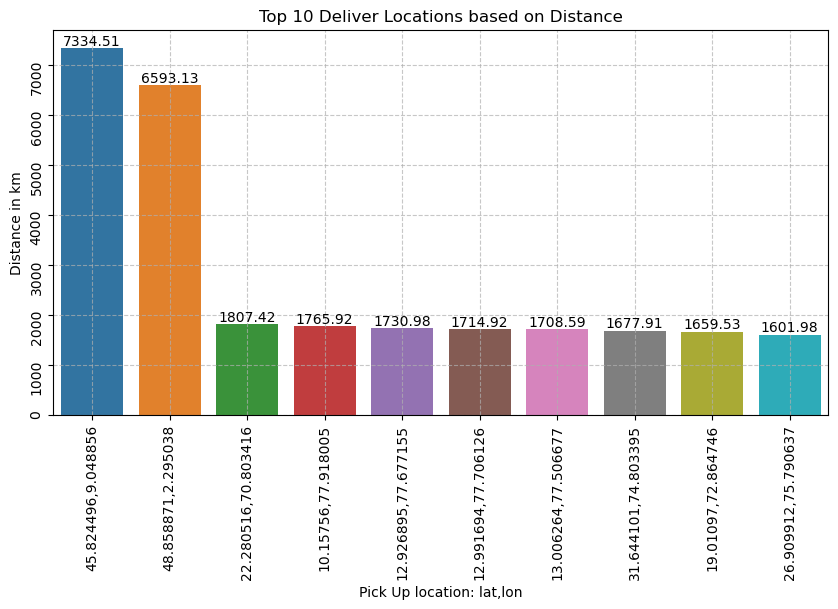

In [33]:

plt.figure(figsize=(10, 5))


x = list(df_mean_new2['Deliver_location'])
values = list(df_mean_new2['Distance_km'])

#custom_palette = sns.color_palette("husl", len(x))

ax = sns.barplot(x=x, y=values)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color='black', fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Top 10 Deliver Locations based on Distance')
plt.xlabel('Pick Up location: lat,lon')
plt.ylabel('Distance in km')

# Rotate x ticks and set y ticks in rotation
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Show plot
plt.show()

In [35]:
df_mean_new2

,C_Lat,C_Lon,Distance_km,Deliver_location
220609,45.824496,9.048856,7334.514772,"45.824496,9.048856"
220610,48.858871,2.295038,6593.128967,"48.858871,2.295038"
125650,22.280516,70.803416,1807.417025,"22.280516,70.803416"
1,10.157560,77.918005,1765.919272,"10.15756,77.918005"
6000,12.926895,77.677155,1730.979399,"12.926895,77.677155"
30151,12.991694,77.706126,1714.918469,"12.991694,77.706126"
33748,13.006264,77.506677,1708.593469,"13.006264,77.506677"
220608,31.644101,74.803395,1677.908822,"31.644101,74.803395"
120657,19.010970,72.864746,1659.529668,"19.01097,72.864746"
147757,26.909912,75.790637,1601.981912,"26.909912,75.790637"


In [37]:
## Geographical heatmap

In [36]:
import folium
from folium.plugins import HeatMap

# Sample data
data = [
    {'latitude': 45.824496, 'longitude': 9.048856, 'distance': 7334.514779},
    {'latitude': 48.858871, 'longitude': 2.295038, 'distance': 6593.128967},
    {'latitude':22.280516, 'longitude': 70.803416, 'distance': 1807.417025},
    {'latitude': 10.157560, 'longitude': 77.918005, 'distance':1765.919272},
    {'latitude': 12.926895, 'longitude': 77.677155, 'distance': 1730.979399},
    {'latitude': 12.991694, 'longitude': 77.706126, 'distance': 1714.918469},
    {'latitude': 13.006264, 'longitude': 77.506677, 'distance': 1708.593469},
    {'latitude': 31.644101, 'longitude': 74.803395, 'distance': 1677.908822},
    {'latitude': 19.010970, 'longitude': 72.864746, 'distance': 1659.529668},
    {'latitude': 26.909912, 'longitude': 75.790637, 'distance': 1601.981912}
    
    # Add more data points as needed
]

# # Load the data from a CSV file
# data = list(df_mean_new)

# Create a base map centered at a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=3)

# Add data points to the map
for point in data:
    folium.Marker(location=[point['latitude'], point['longitude']], popup=f"distance: {point['distance']}").add_to(m)

# Generate heatmap based on the 'value' column
heat_data = [[point['latitude'], point['longitude'], point['distance']] for point in data]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
#m.save('heatmap.html')

m

In [38]:
#### Conclusion Farthest Delivery location is germany and italy

In [166]:
df.head(3)

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,Distance_km,duration,Pickup_location,Drop_location
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,2.235873,26.733333,"28.468983,77.063728","28.449929,77.07123"
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,1.627795,21.633333,"28.468983,77.063728","28.454522,77.066637"
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,0.904444,18.183333,"28.468983,77.063728","28.46157,77.06759"


In [40]:
Count_of_orders_source = df.groupby(['order_pickedup_time'])['duration'].count().reset_index().sort_values(by='duration',ascending=False) 

Count_of_orders_source.head(20)

Count_of_orders_source[['Date', 'Time']] = Count_of_orders_source['order_pickedup_time'].str.split(' ', expand=True)

Count_of_orders_source



,order_pickedup_time,duration,Date,Time
33514,2016-05-22 15:36:13,8,2016-05-22,15:36:13
140559,2016-07-31 15:12:52,6,2016-07-31,15:12:52
33503,2016-05-22 15:35:47,6,2016-05-22,15:35:47
42499,2016-05-29 14:59:47,5,2016-05-29,14:59:47
33522,2016-05-22 15:36:26,5,2016-05-22,15:36:26
...,...,...,...,...
76178,2016-06-23 13:16:44,1,2016-06-23,13:16:44
76179,2016-06-23 13:16:45,1,2016-06-23,13:16:45
76180,2016-06-23 13:17:19,1,2016-06-23,13:17:19
76181,2016-06-23 13:17:21,1,2016-06-23,13:17:21


## Making Prediction model with time series for the order pickedup forecasting. We will try to to see if there seasoonality exists in the data. We will first try to see pdq plots for the data and check the plot diagnostics. based on the result we will choose the interval for the best performance

In [45]:
Count_of_orders_dest = df.groupby(['order_delivered_time'])['duration'].count().reset_index().sort_values(by='duration',ascending=False) 

Count_of_orders_dest.head(20)

Count_of_orders_dest[['Date', 'Time']] = Count_of_orders_dest['order_delivered_time'].str.split(' ', expand=True)

Count_of_orders_dest

,order_delivered_time,duration,Date,Time
33486,2016-05-22 15:36:29,4,2016-05-22,15:36:29
173828,2016-08-20 15:16:56,4,2016-08-20,15:16:56
32649,2016-05-22 07:48:00,4,2016-05-22,07:48:00
193168,2016-08-30 14:41:48,4,2016-08-30,14:41:48
165217,2016-08-14 15:47:31,4,2016-08-14,15:47:31
...,...,...,...,...
77809,2016-06-24 13:13:52,1,2016-06-24,13:13:52
77811,2016-06-24 13:14:21,1,2016-06-24,13:14:21
77812,2016-06-24 13:14:45,1,2016-06-24,13:14:45
77813,2016-06-24 13:14:54,1,2016-06-24,13:14:54


In [46]:
data4 = Count_of_orders_dest

data4.drop(['order_delivered_time','Time'], axis=1, inplace=True)

data4 = data4.groupby('Date')['duration'].count().reset_index().sort_values(by='Date',ascending=True)
#data3.set_index('Date', inplace=True)

data4

,Date,duration
0,2016-04-19,4
1,2016-04-20,3
2,2016-04-21,7
3,2016-04-22,35
4,2016-04-23,56
...,...,...
154,2016-09-21,1340
155,2016-09-22,1119
156,2016-09-23,1278
157,2016-09-24,1624


In [47]:
data4.rename(columns = {'duration':'Delivery_Count'}, inplace = True)

data3.rename(columns = {'duration':'Pickup_Count'}, inplace = True)


In [48]:
data4.set_index('Date', inplace=True)

In [49]:
data4

,Delivery_Count
Date,
2016-04-19,4
2016-04-20,3
2016-04-21,7
2016-04-22,35
2016-04-23,56
...,...
2016-09-21,1340
2016-09-22,1119
2016-09-23,1278


In [280]:
# res = pd.merge(data3, data4, left_index=True, right_index=True)

# res

In [279]:
#res.to_csv(r'C:\Users\Reet\Downloads\data_science_problem\data_science_problem\delivery.csv')

In [50]:
res = pd.read_csv(r'C:\Users\Reet\Downloads\data_science_problem\data_science_problem\delivery.csv')
res.rename(columns = {'Date_y':'Date','Duration_x':'Pickup_Count','Duration_y':'Delivery_Count'}, inplace = True)
res = res.drop(['Unnamed: 0','Date_x'], axis=1)
res

,duration_x,Date,duration_y
0,4,4/19/2016,4
1,3,4/20/2016,3
2,7,4/21/2016,7
3,35,4/22/2016,35
4,56,4/23/2016,56
...,...,...,...
154,1208,9/21/2016,1340
155,1040,9/22/2016,1119
156,1182,9/23/2016,1278
157,1457,9/24/2016,1624


In [51]:
res.rename(columns = {'duration_x':'Pickup_Count','duration_y':'Delivery_Count'}, inplace = True)

In [52]:
res

,Pickup_Count,Date,Delivery_Count
0,4,4/19/2016,4
1,3,4/20/2016,3
2,7,4/21/2016,7
3,35,4/22/2016,35
4,56,4/23/2016,56
...,...,...,...
154,1208,9/21/2016,1340
155,1040,9/22/2016,1119
156,1182,9/23/2016,1278
157,1457,9/24/2016,1624


### Plotting to see the trend of pick up and delivery over the time. Seems like in last two months less number of orders has been picked up and more number of orders has been delivered. that means some packages which were ordered previously they delivered later before they were either on hold or they travelled long distance. Took more time.

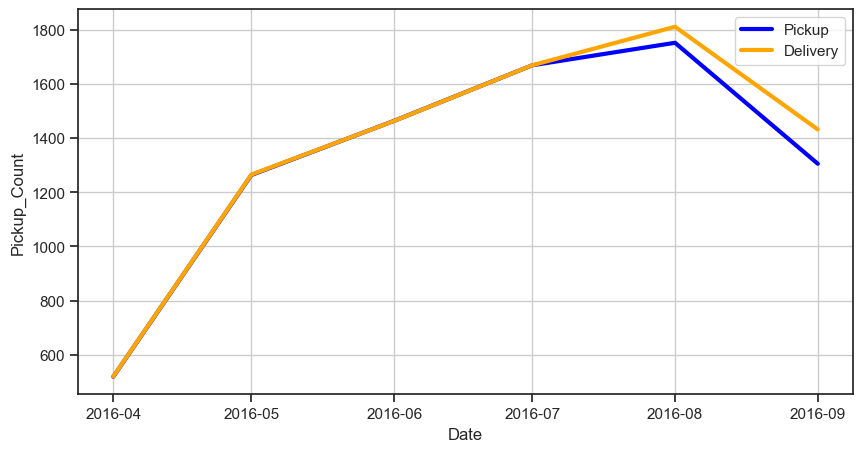

In [309]:


import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%m')


plt.figure(figsize = (10,5))
sns.set(style="ticks")
plt.grid(True)
plt.grid(which='minor')
data_sampled_pickup = res['Pickup_Count'].resample('MS').mean()
data_sampled_delivery = res['Delivery_Count'].resample('MS').mean()
ax = sns.lineplot(data=data_sampled_pickup, linewidth=3, color="blue", label="Pickup")
ax = sns.lineplot(data=data_sampled_delivery, linewidth=3, color="orange", label="Delivery")




ax.xaxis.set_minor_locator(months) 

### Trying to find the top pick up location with highest number of orders

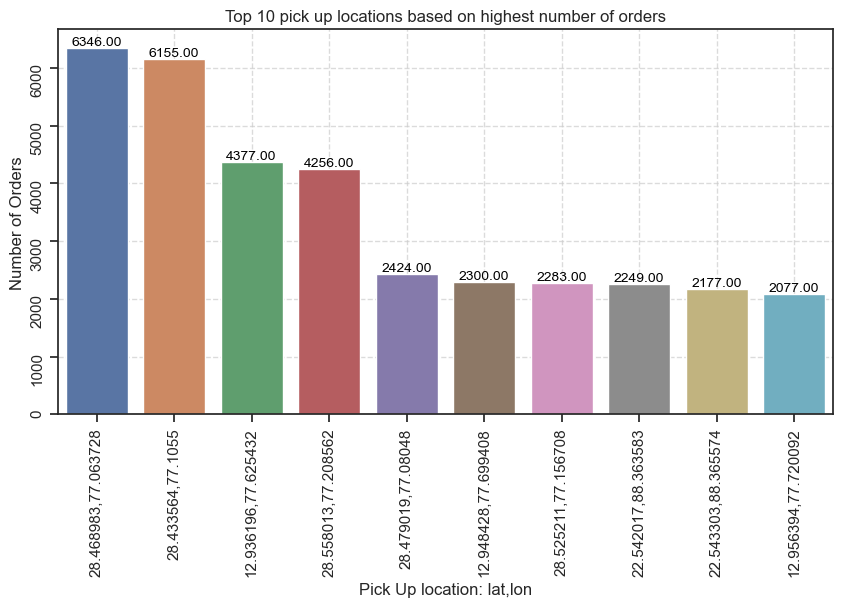

In [66]:
droped_df = df.groupby(['Pickup_location'])['Drop_location'].count().reset_index().rename(columns={'Drop_location': 'count'})
droped_df = droped_df.sort_values(by='count', ascending=False)
droped_df = droped_df.head(10)
plt.figure(figsize=(10, 5))


x = list(droped_df['Pickup_location'])
values = list(droped_df['count'])

#custom_palette = sns.color_palette("husl", len(x))

ax = sns.barplot(x=x, y=values)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color='black', fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Top 10 pick up locations based on highest number of orders')
plt.xlabel('Pick Up location: lat,lon')
plt.ylabel('Number of Orders')

# Rotate x ticks and set y ticks in rotation
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Show plot
plt.show()

In [315]:
#!pip3 install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------------------- --------------- 61.4/100.0 kB 825.8 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 823.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [350]:
df_mean_new.drop(['Pickup_location'], axis=1, inplace=True)

C:\Users\Reet\AppData\Local\Temp\ipykernel_38960\3111117029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_new.drop(['Pickup_location'], axis=1, inplace=True)


### Now we will see the data orders by date. Seeing the time series we will try to see the pattern in the time series data.

In [416]:
### prediction model of expected travel distance order

df

,value
date,
2022-01-01,0
2022-01-02,1
2022-01-03,2
2022-01-04,3
2022-01-05,4
...,...
2022-12-27,360
2022-12-28,361
2022-12-29,362


In [426]:
data_distance = df.groupby(['order_pickedup_time'])['Distance_km'].mean().reset_index().sort_values(by='Distance_km',ascending=False) 

data_distance.head(20)

data_distance[['Date', 'Time']] = data_distance['order_pickedup_time'].str.split(' ', expand=True)

data_distance


,order_pickedup_time,Distance_km,Date,Time
141776,2016-08-01 12:55:19,7334.514772,2016-08-01,12:55:19
89641,2016-07-01 08:39:49,6834.544049,2016-07-01,08:39:49
139039,2016-07-30 15:51:56,6594.157482,2016-07-30,15:51:56
139147,2016-07-30 16:24:51,6592.949103,2016-07-30,16:24:51
138795,2016-07-30 14:53:20,6592.280315,2016-07-30,14:53:20
...,...,...,...,...
183501,2016-08-26 10:11:30,0.000000,2016-08-26,10:11:30
218902,2016-09-20 09:22:01,0.000000,2016-09-20,09:22:01
183500,2016-08-26 10:10:08,0.000000,2016-08-26,10:10:08
202888,2016-09-07 15:22:02,0.000000,2016-09-07,15:22:02


In [427]:
data5 = data_distance

data5.drop(['order_pickedup_time','Time'], axis=1, inplace=True)

data5 = data5.groupby('Date')['Distance_km'].mean().reset_index().sort_values(by='Date',ascending=True)
data5.set_index('Date', inplace=True)

data5

,Distance_km
Date,
2016-04-19,3.370211
2016-04-20,3.068277
2016-04-21,5.764969
2016-04-22,1.549781
2016-04-23,1.853138
...,...
2016-09-21,1.460881
2016-09-22,1.756890
2016-09-23,1.470296


In [428]:
data5.index = pd.to_datetime(data5.index)

In [429]:
data5

,Distance_km
Date,
2016-04-19,3.370211
2016-04-20,3.068277
2016-04-21,5.764969
2016-04-22,1.549781
2016-04-23,1.853138
...,...
2016-09-21,1.460881
2016-09-22,1.756890
2016-09-23,1.470296


In [436]:
k = []

for i in range(0,len(data5)):
    k.append(data5['Distance_km'][i])

j = []

for i in range(0,len(data5)):
    j.append(data5.index[i])

In [442]:
# Sample time series data
data6 = {'date': j,
        'value': k}  # Just a sample, replace with your actual data
df6 = pd.DataFrame(data6)
df6.set_index('date', inplace=True)

In [445]:
df6

,value
date,
2016-04-19,3.370211
2016-04-20,3.068277
2016-04-21,5.764969
2016-04-22,1.549781
2016-04-23,1.853138
...,...
2016-09-21,1.460881
2016-09-22,1.756890
2016-09-23,1.470296


In [448]:
df6.sort_index(inplace=True)

### Try to see seasonal decomposition of the data

<Figure size 1500x800 with 0 Axes>

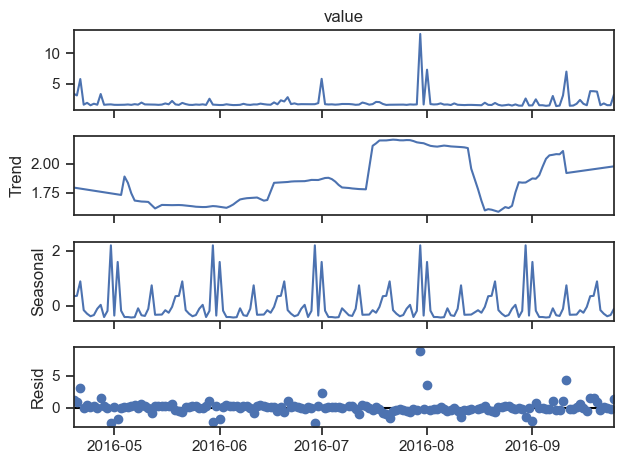

In [463]:
##seasonal decomposition Analysis
plt.figure(figsize=(15, 8))
from statsmodels.tsa import seasonal

decomposed1 = seasonal.seasonal_decompose(x=df6['value'],model='additive', extrapolate_trend='freq', period=30)
fig = decomposed1.plot()
plt.show()


[(0, 0, 0, 16), (0, 0, 1, 16), (0, 1, 0, 16), (0, 1, 1, 16), (1, 0, 0, 16), (1, 0, 1, 16), (1, 1, 0, 16), (1, 1, 1, 16)]
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:605.6955027912112
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  158
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -300.848
Date:                Fri, 05 Apr 2024   AIC                            605.696
Time:                        04:16:08   BIC                            611.821
Sample:                             0   HQIC                           608.183
                                - 158                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7134      0.023  

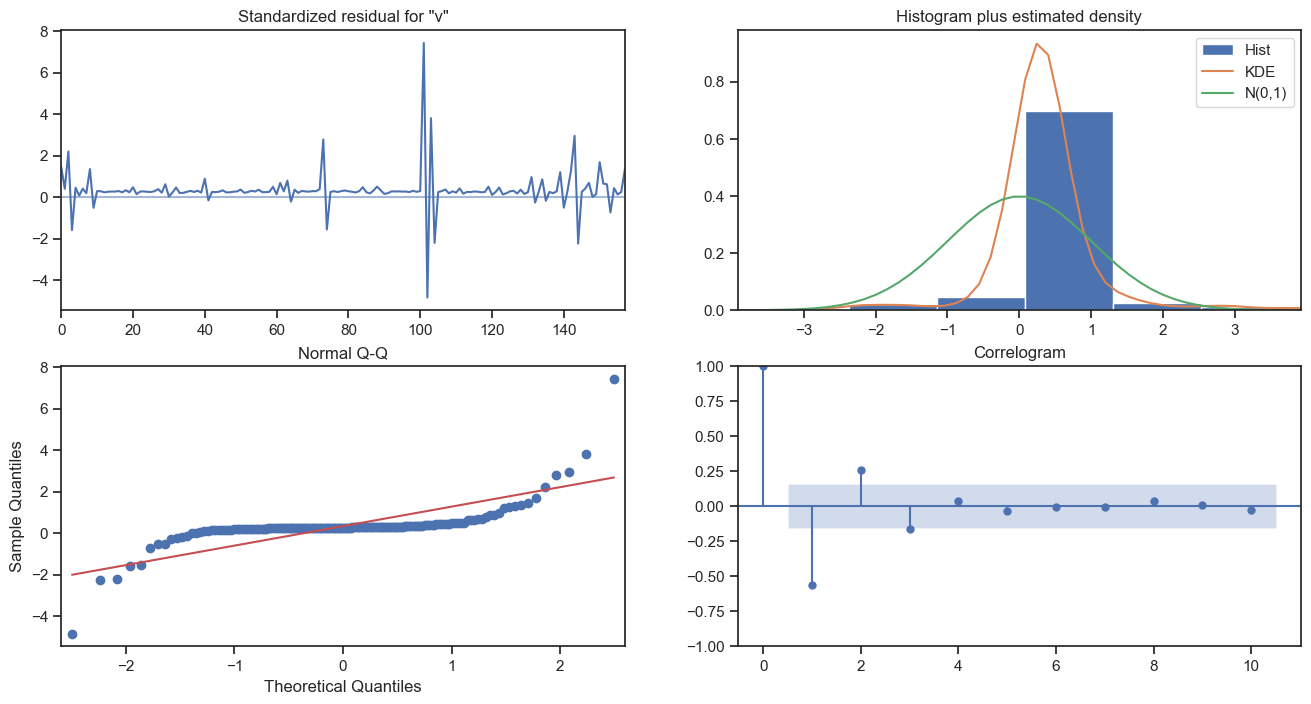

In [495]:
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
sns.set(style="ticks")

p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

print(seasonal_pd)

for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df6['value'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

### Fitting with the latest Value

mod = sm.tsa.statespace.SARIMAX(df6['value'])
results = mod.fit()

## print Result summary

print(results.summary())

#### plot_result_diagnostic statistics ##

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [496]:
## Choosing the best parameter 


#### Getting the BEst paramters #### 



for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(df6['value'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:713.2258702027996
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:667.2353021694016
ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:667.2353021694016
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:622.8592279423074
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:622.8592279423074
ARIMA(0, 1

### Took the best interval of AIC which is least

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  158
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -261.994
Date:                Fri, 05 Apr 2024   AIC                            527.988
Time:                        04:16:28   BIC                            534.101
Sample:                             0   HQIC                           530.471
                                - 158                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9919      0.051    -19.613      0.000      -1.091      -0.893
sigma2         1.6062      0.064     25.029      0.000       1.480       1.732
Ljung-Box (L1) (Q):                   0.25   Jarque-

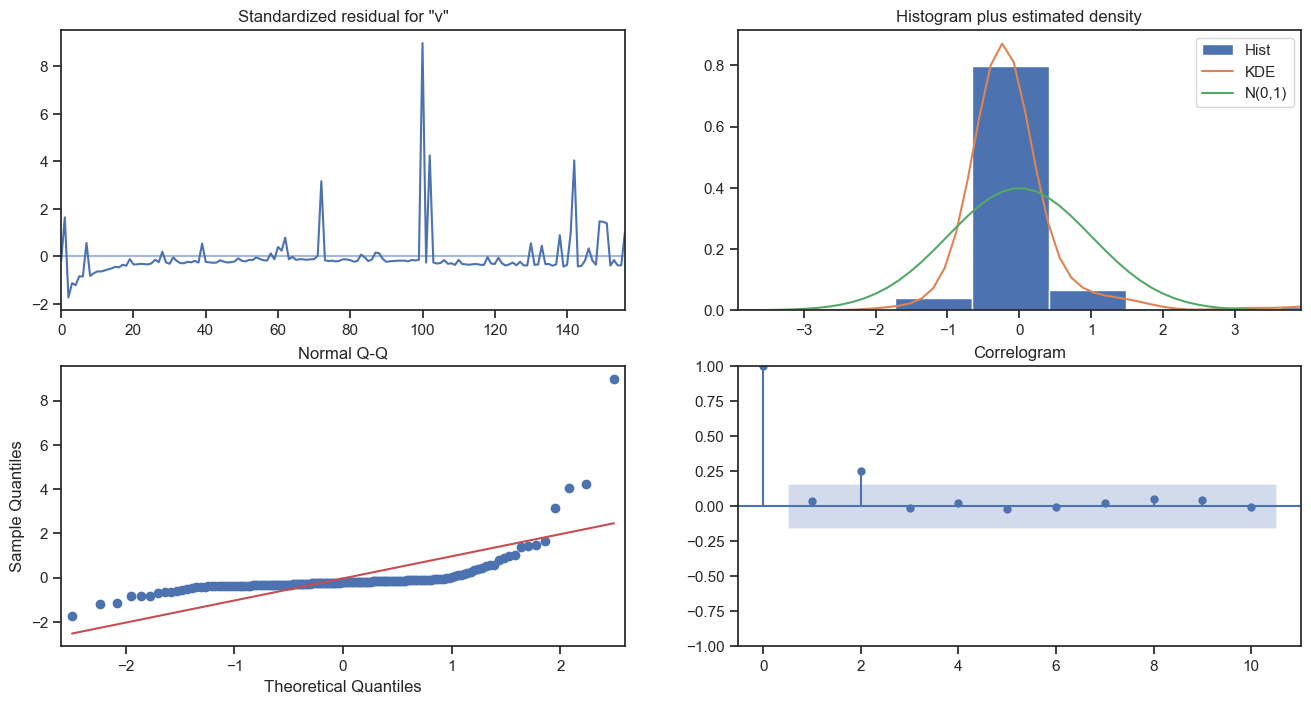

In [497]:
mod = sm.tsa.statespace.SARIMAX(df6['value'],order=(0, 1, 1),seasonal_order=(0,0,0,16))
results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

## one step ahead prediction from the index 150. means from last 15 days to onwards.

In [510]:
pred = results.get_prediction(start=df6.index[150], dynamic=False)
pred_ci = pred.conf_int()


In [511]:
pred_ci.iloc[:,1]

date
2016-09-18    4.384086
2016-09-19    4.402190
2016-09-20    4.419944
2016-09-21    4.436878
2016-09-22    4.432152
2016-09-23    4.430311
2016-09-24    4.425763
2016-09-25    4.421240
Name: upper value, dtype: float64

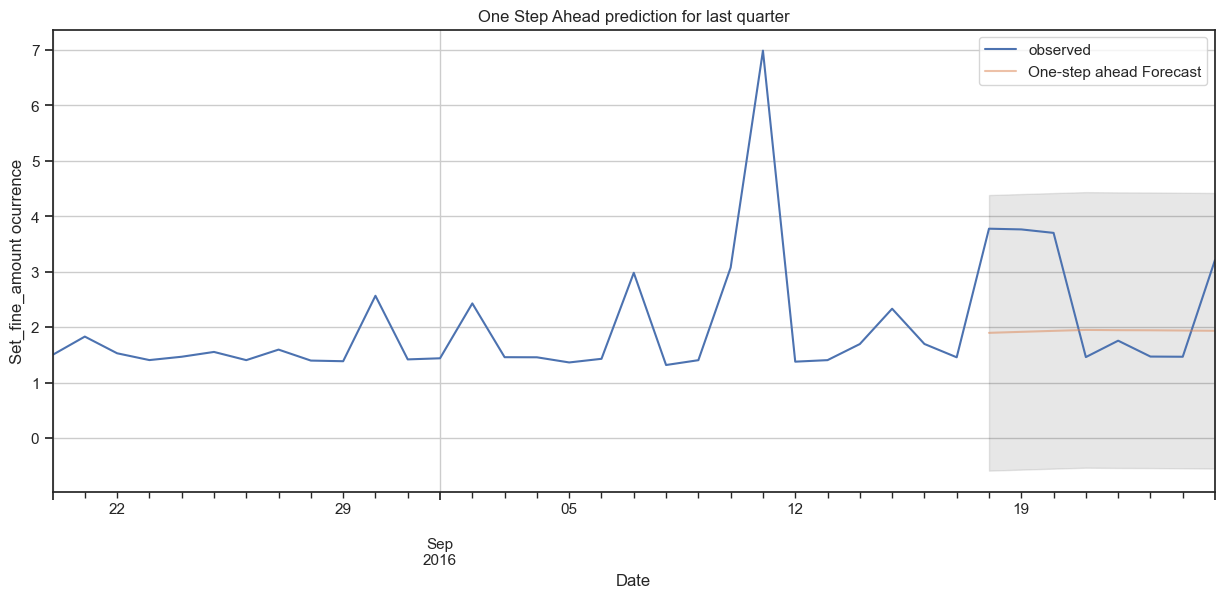

In [512]:
ax = df6['value']['2016-08-20':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(15, 6))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.1)
plt.grid(True)

ax.set_xlabel('Date')
ax.set_ylabel('Set_fine_amount ocurrence')
plt.legend()
plt.title('One Step Ahead prediction for last quarter') 
plt.show() 

###  Now for Time series forecasting  with SARIMAX modelI have seen some abnormality here. I have seen while applying the interval for leadt AIC score Even though the data is normalized but the p value, skewness and heteroskeasdictiy gets worse. It happens to be due various reasons.

#### 1.  The Data is not very large.
#### 2. There is a abrupt change in the data. There is one single row in the dataset which has  no pickup information but has high delievry information. Also, Some geographical location has very high delivery/ pick up information. OR let's say in some day theres very high number of delivery.

### In that I have applied simple Exponential Smoothing model which gives reasonable results

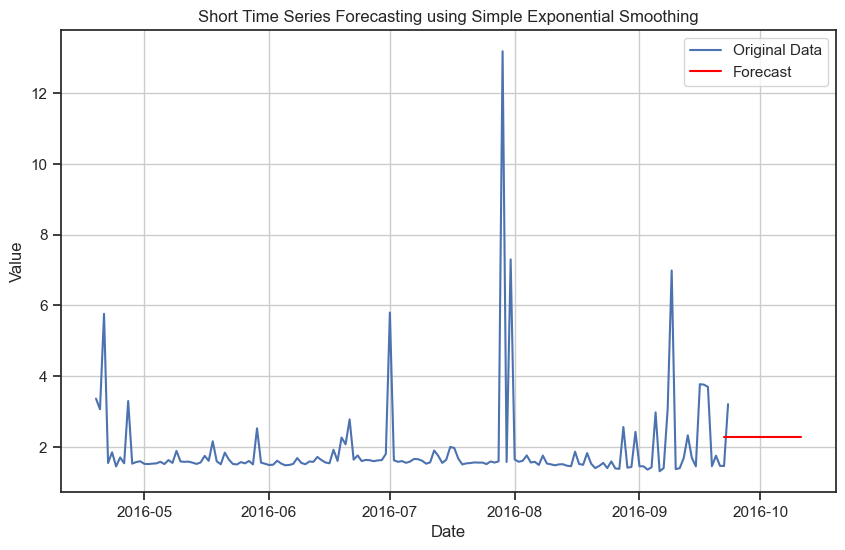

In [501]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Sample time series data
jj = {'date': pd.date_range(start='2016-04-19', periods=158, freq='D'),
        'value': k}
jj2 = pd.DataFrame(jj)
jj2.set_index('date', inplace=True)

# Fit Simple Exponential Smoothing model
model = SimpleExpSmoothing(jj2['value'])
fit_model = model.fit()

# Forecast for the next 5 time periods
forecast = fit_model.forecast(steps=20)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(jj2.index, jj2['value'], label='Original Data')
plt.plot(pd.date_range(start='2016-09-22', periods=20, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Short Time Series Forecasting using Simple Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()


## Tried To Design batteship program with arbitary 2 players. Code has no errors but it will take some time to run.

In [ ]:
####### BAttle Ship Program

In [ ]:
class BattleShip:
    def __init__(self, name, length, health, damage):
        self.name = name
        self.length = length
        self.health = health
        self.damage = damage
        self.position = [0, 0]
        self.x = 0
        self.y = 0
        self.status = "alive"



    def __str__(self):
        return self.name
    
    
class Board:
    
    def __init__(self, size):
        self.size = size
        self.board = [[None for i in range(size)] for j in range(size)]
        self.ships = []
        
    def add_ship(self, ship):
        self.ships.append(ship)
        for i in range(ship.length):
            self.board[ship.x][ship.y + i] = ship

    def is_on_board(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size

    def is_free(self, x, y):
        return self.board[x][y] is None

    def is_occupied(self, x, y):
        return self.board[x][y] is not None

    def get_ship(self, x, y):
        return self.board[x][y]

    def get_free_cells(self):
        return [(x, y) for x in range(self.size) for y in range(self.size) if self.is_free(x, y)]

    def get_occupied_cells(self):
        return [(x, y) for x in range(self.size) for y in range(self.size) if self.is_occupied(x, y)]

    def __str__(self):
        return str(self.board)
    
class Player:
    
    def __init__(self, name):
        self.name = name
        self.health = 100
        self.board = Board(9)
        self.damage = 0
        self.ships = []

    def add_ship(self, ship):
        self.ships.append(ship)
        for i in range(ship.length):
            self.board.board[ship.x][ship.y + i] = ship
            
    def move(self, direction):
        if(direction == "up"):
            self.y -= 1
        elif(direction == "down"):
            self.y += 1
        elif(direction == "left"):
            self.x -= 1
        elif(direction == "right"):
            self.x += 1
        
    def attack(self, target):
        target.health -= self.damage
        if(target.health <= 0):
            target.health = 0
            print(self.name + " has destroyed " + target.name)

    def is_alive(self):
        return any(ship.health > 0 for ship in self.ships)
            
class Game:
    
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.current_player = player1
        self.other_player = player2

    def play(self):
        while True:
            if self.current_player == player1:
                self.current_player = player2
                self.other_player = player1
            else:
                self.current_player = player1
                self.other_player = player2
                self.current_player.attack(self.other_player)

            if not self.current_player != 0:
                print(self.other_player.name + " wins!")
                break
                print("Game over.")
                
player1 = Player("Sam")
player2 = Player("Alex")
game = Game(player1, player2)
game.play()
                
             

        
        
        

    


    